In [393]:
import numpy as np
import pandas as pd 
import os


### merge all 12 files into a single file

In [394]:
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv')]
# # make a empty dataframe for further use
all_months_data = pd.DataFrame()
for file in files:
     df = pd.read_csv('./Sales_Data/'+file)
     # print(file)
     all_months_data = pd.concat([all_months_data,df])
# all_months_data 
all_months_data.to_csv('all_data.csv',index=False) 
all_data = pd.read_csv('all_data.csv')
all_data = all_data[all_data['Order ID']!='Order ID']
all_data.sample(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
13699,189617,iPhone,1,700,04/22/19 15:34,"902 5th St, Austin, TX 73301"
165005,269112,Apple Airpods Headphones,1,150,10/23/19 13:15,"36 Lake St, Atlanta, GA 30301"
121299,194860,USB-C Charging Cable,1,11.95,05/13/19 23:22,"292 South St, Austin, TX 73301"
38315,303220,USB-C Charging Cable,1,11.95,12/31/19 18:22,"165 Cherry St, Portland, OR 97035"
84550,229868,USB-C Charging Cable,1,11.95,07/16/19 13:30,"801 11th St, Los Angeles, CA 90001"
99538,217451,AAA Batteries (4-pack),1,2.99,06/28/19 22:13,"789 14th St, San Francisco, CA 94016"
9751,185866,Wired Headphones,1,11.99,04/21/19 11:35,"677 Ridge St, Atlanta, GA 30301"
102177,219968,27in 4K Gaming Monitor,1,389.99,06/01/19 16:34,"255 Sunset St, Portland, OR 97035"
180753,253515,USB-C Charging Cable,1,11.95,09/04/19 14:55,"655 13th St, Atlanta, GA 30301"
148151,289331,LG Dryer,1,600.0,11/23/19 14:25,"984 Spruce St, San Francisco, CA 94016"


In [395]:
all_data[all_data['Order ID']=='Order ID'].count()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [396]:
# Check all data, is ok for further process or not
all_data.info()

# as we can see that there are (null values and) object datd type , which should be numeric so first clean the data and make it useable
# Quantity = to_numeric
# price each = to_numeric
# order_date = to_date


<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [397]:
all_data = all_data.dropna()
all_data.isna().any()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### now make the valid data types

In [398]:
# convert the both columns into int to avoid error
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [399]:
# first make a column for month
# all_data['Order Date'].dtype

# frist extract the month and make diff column
all_data['month']=all_data['Order Date'].str[0:2]
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,04
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,04
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,09
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,09
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,09


### TASK # 01 what was the best month for sales ? and how much earned that month

In [400]:
# for further use incase you restart the project
all_data.to_csv('all_data_with_sale_and_month.csv',index=False)
all_data = pd.read_csv('all_data_with_sale_and_month.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4
...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9
185946,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9
185947,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9


In [401]:
results  = all_data.groupby('month')['sales'].sum()
results


month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

### now show that using graph

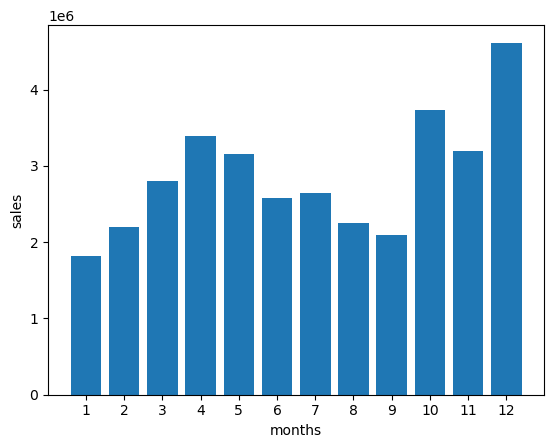

In [402]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(results.index,results.values)
plt.xticks(results.index)
# plt.yticks(results.values)
plt.xlabel("months")
plt.ylabel("sales")
plt.show()

### task 02

#### what city has the highest number of sales

In [403]:
# first make a column for city , then group by city , and sum 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


In [404]:
# step # 1 make a column for city 
all_data['city'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1] + ' ' + x.split(',')[2].strip().split(' ')[0])

# ['917 1st St', ' Dallas', ' TX 75001']
# x.split(',')[1]:
# Picks the city, which is the second item: ' Dallas'

# x.split(',')[2]:
# Picks the "state and zip", which is: ' TX 75001'

# .strip().split(' ')[0]:
# .strip() removes leading/trailing spaces → 'TX 75001'
# .split(' ')[0] gets the state abbreviation → 'TX'

# all_data

# group by city step # 2 
all_data.groupby('city')['sales'].sum()




city
Atlanta GA          2795498.58
Austin TX           1819581.75
Boston MA           3661642.01
Dallas TX           2767975.40
Los Angeles CA      5452570.80
New York City NY    4664317.43
Portland ME          449758.27
Portland OR         1870732.34
San Francisco CA    8262203.91
Seattle WA          2747755.48
Name: sales, dtype: float64

In [405]:
 # draw a bar to check 

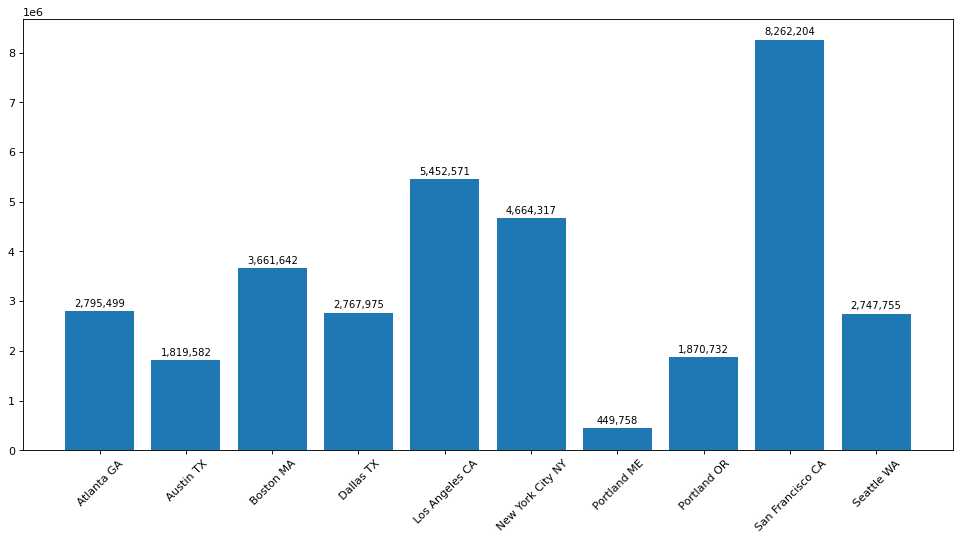

In [406]:
import matplotlib.pyplot as plt
city_sales = all_data.groupby('city')['sales'].sum()
plt.figure(figsize=(15, 7),dpi=80)
plt.xticks(rotation=45)
bars = plt.bar(city_sales.index,city_sales.values)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
        height + 50000,                     # y position (just above the bar)
        f'{height:,.0f}',                   # formatted label (e.g., 1,200,000)
        ha='center', va='bottom', fontsize=9
    )

    
plt.show()
all_data.to_csv('all_data_task02.csv')

### Task 03

### What time should we display advertisement to maximize thelikehood of customers buying prod

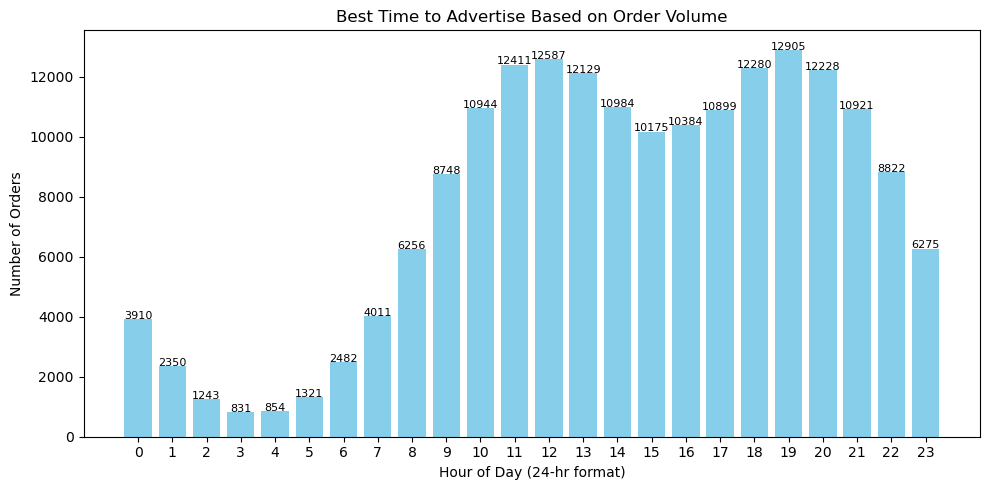

In [414]:
# change the Order Date to date_time
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# # Extract hour only
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data

# Group by hour
ad_time = all_data.groupby('Hour')['Quantity Ordered'].count()
ad_time



plt.figure(figsize=(10, 5))
bars = plt.bar(ad_time.index, ad_time.values, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height}', ha='center', fontsize=8)

plt.xticks(ad_time.index)
plt.xlabel('Hour of Day (24-hr format)')
plt.ylabel('Number of Orders')
plt.title('Best Time to Advertise Based on Order Volume')
plt.tight_layout()
plt.show()
# # all_data
all_data.to_csv('all_data_task03.csv')
# all_data.info()



### Task 04 what product are most often sold together

In [415]:

df = all_data[all_data['Order ID'].duplicated(keep=False)]
# df.head(20)

# # now join the prodcuts in a single cell on the basis of duplicate id
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head(20)

# # drop the duplicate to avoid the same row again and again
df = df[['Order ID','grouped']].drop_duplicates()
# df.to_csv('all_data_task04.csv')
df.head(20)
# df.groupby('grouped').sum()


C:\Users\DIWANs\AppData\Local\Temp\ipykernel_25704\2716107233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [416]:
from itertools import combinations
from collections import Counter

count  = Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
display(count.most_common(10))
top_pairs = count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

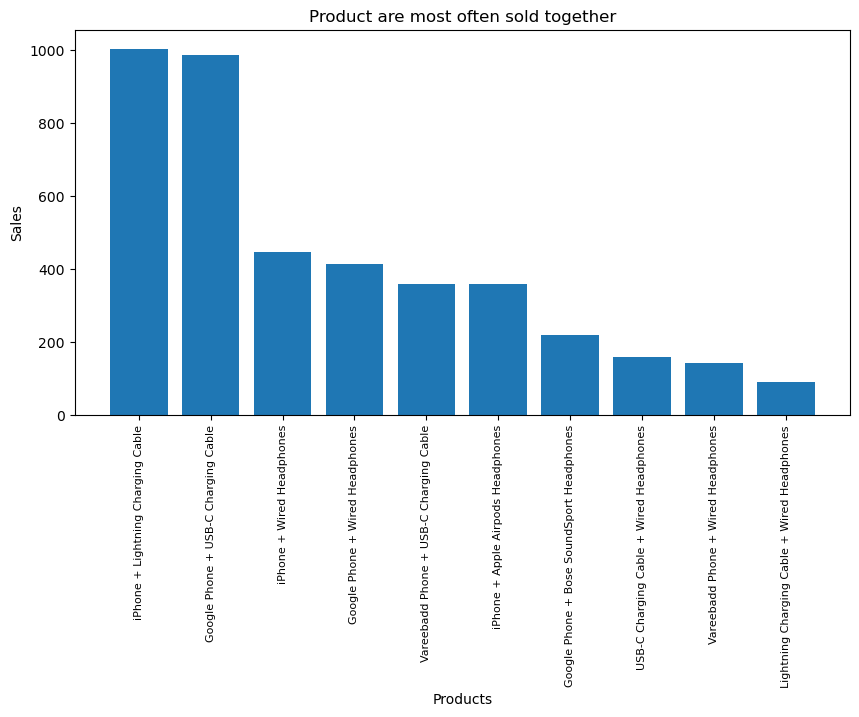

In [417]:
# draw its graph
import matplotlib.pyplot as plt
top_pairs = count.most_common(10)
x = [f"{pair[0]} + {pair[1]}" for pair,_ in top_pairs]
y = [count for _,count in top_pairs]
plt.figure(figsize = (10,5),dpi =100)

plt.xticks(rotation  = 90,size=8)
plt.title("Product are most often sold together")
plt.xlabel("Products")
plt.ylabel("Sales")
plt.bar(x,y)
plt.show()


### task 05

### what product sold the most ? why you think it sold the most?

In [411]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles CA,20
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco CA,16
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco CA,7
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco CA,17


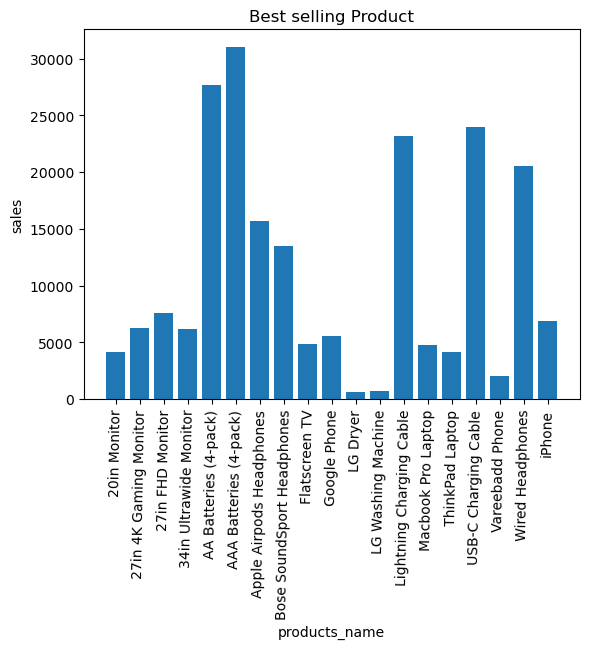

In [412]:
high_sell_product = all_data.groupby('Product')['Quantity Ordered'].sum()
plt.bar(high_sell_product.index,high_sell_product.values)
plt.title('Best selling Product')
plt.xticks(rotation = 89)
plt.xlabel('products_name')
plt.ylabel('sales')
plt.show()

C:\Users\DIWANs\AppData\Local\Temp\ipykernel_25704\3815258979.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(high_sell_product.index, rotation=90, fontsize=8)


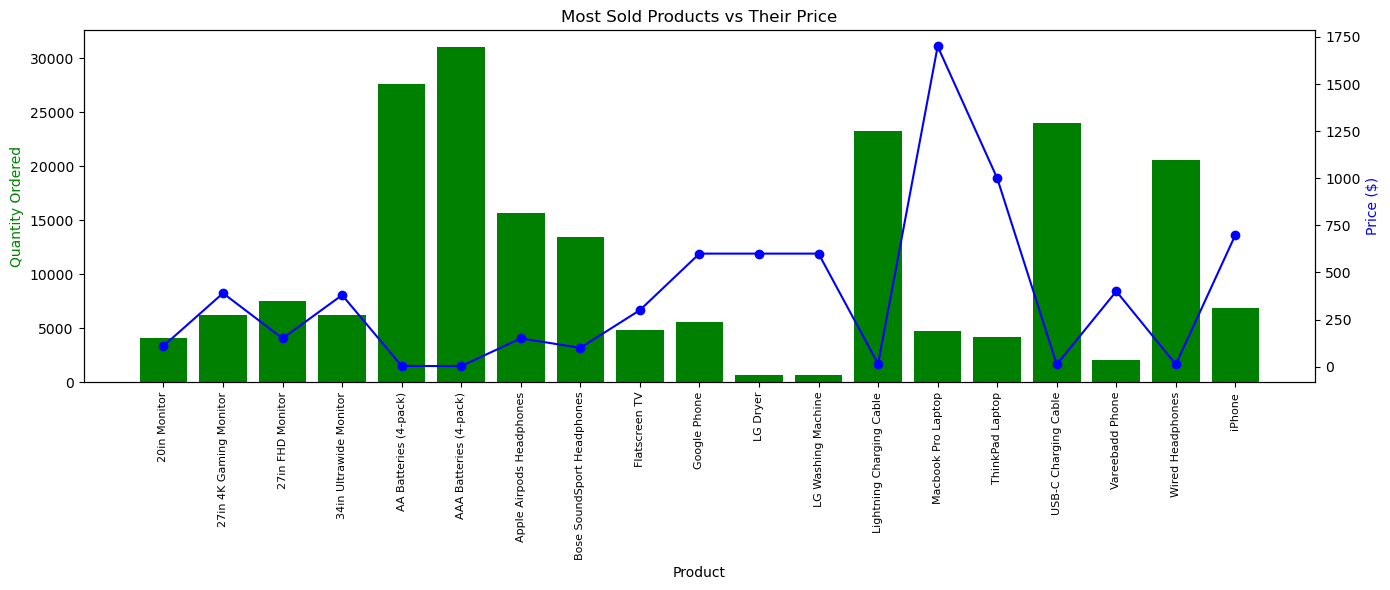

In [413]:

price = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.bar(high_sell_product.index, high_sell_product.values, color='g')
ax2.plot(high_sell_product.index, price[high_sell_product.index], 'bo-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
# ax1.set_xticks(range(len(high_sell_product.index)))
ax1.set_xticklabels(high_sell_product.index, rotation=90, fontsize=8)
plt.title('Most Sold Products vs Their Price')
plt.tight_layout()
plt.show()
